<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yyyy       100 non-null    int64  
 1   month      100 non-null    object 
 2   tmax       100 non-null    object 
 3   tmin       100 non-null    object 
 4   tmax_pred  86 non-null     float64
 5   tmin_pred  89 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


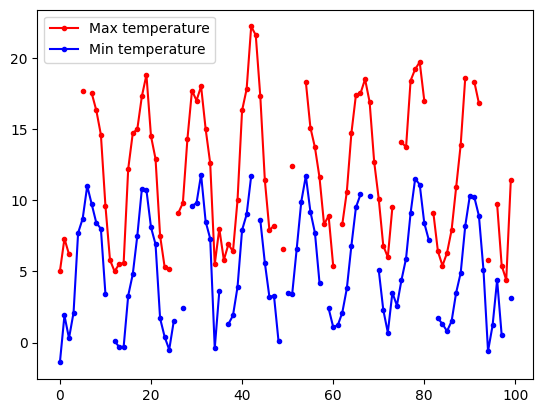

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def load_data():
    # Read the temperature data from "input.txt", skipping the first line
    f = "input2.txt" # sys.stdin
    df = pd.read_csv(f, skiprows=1, sep=r"\s+")

    # データが多いので確認用に減らす
    df = df.head(100)

    # Replace with np.nan if the value starts with "Missing_"
    df['tmax_pred'] = df['tmax'].replace(to_replace="Missing_", value=np.nan, regex=True)
    df['tmin_pred'] = df['tmin'].replace(to_replace="Missing_", value=np.nan, regex=True)
    df['tmax_pred'] = df['tmax_pred'].astype(float)
    df['tmin_pred'] = df['tmin_pred'].astype(float)

    return df


df = load_data()
df.info()

fig, ax = plt.subplots()
x = np.arange(len(df))
ax.plot(x, df['tmax_pred'], 'r.-', label='Max temperature')
ax.plot(x, df['tmin_pred'], 'b.-', label='Min temperature')
ax.legend()


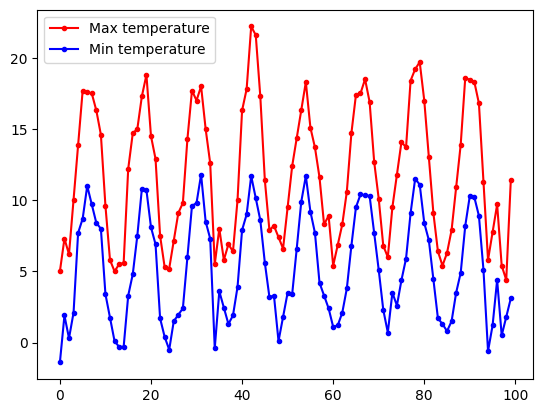

In [64]:
# 欠損値を線形補完
df['tmax_linear'] = df['tmax_pred'].interpolate()
df['tmin_linear'] = df['tmin_pred'].interpolate()

fig, ax = plt.subplots()
x = np.arange(len(df))
ax.plot(x, df['tmax_linear'], 'r.-', label='Max temperature')
ax.plot(x, df['tmin_linear'], 'b.-', label='Min temperature')
ax.legend()

季節性とトレンドを分離。

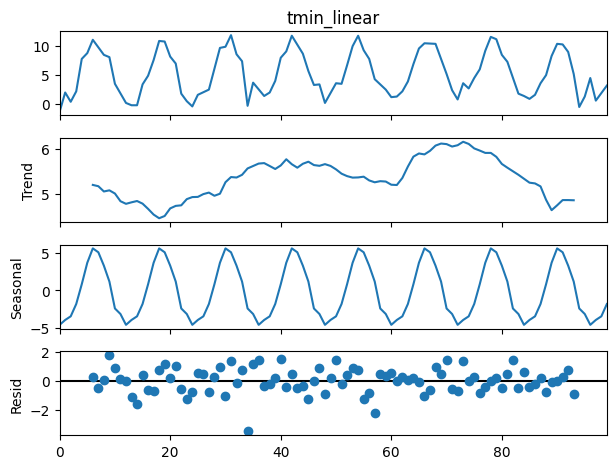

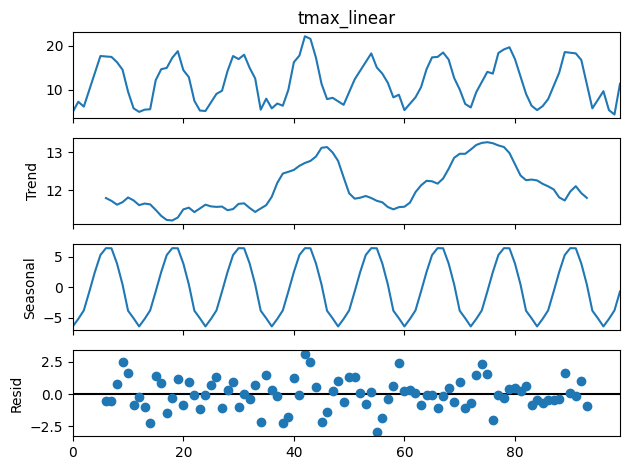

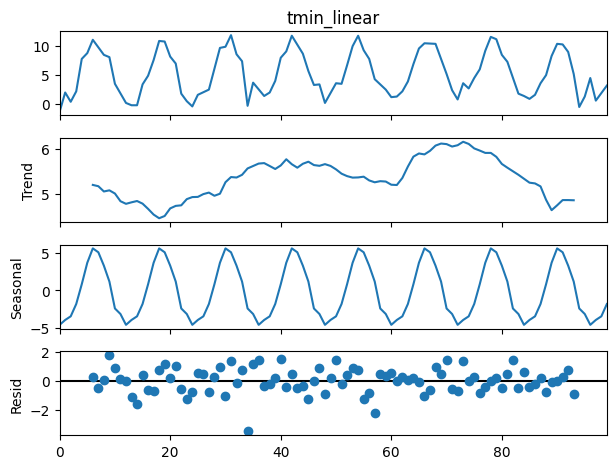

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_tmax = seasonal_decompose(df['tmax_linear'], period=12)
seasonal_tmin = seasonal_decompose(df['tmin_linear'], period=12)
seasonal_tmax.plot()
seasonal_tmin.plot()


statsmodels の STL で季節性とトレンドを分離する。
seasonal_decompose で分離したときよりも、トレンドが滑らかになっている。
残差 (resid) は、元データから季節性とトレンドを取り除いたものなので、残差が 0 に近いという想定を置ければ、欠損値は「季節性＋トレンド」で補完できるはず。

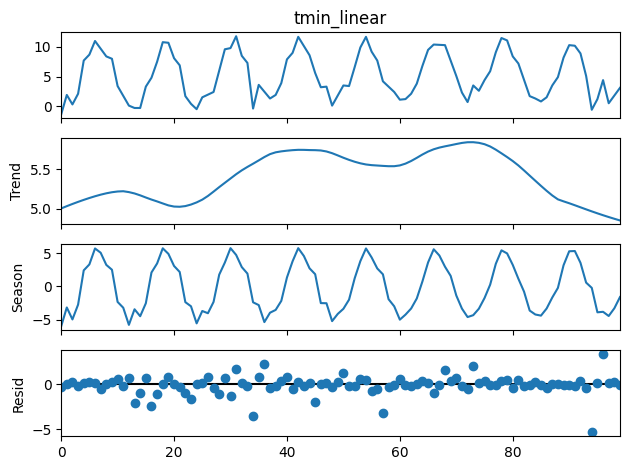

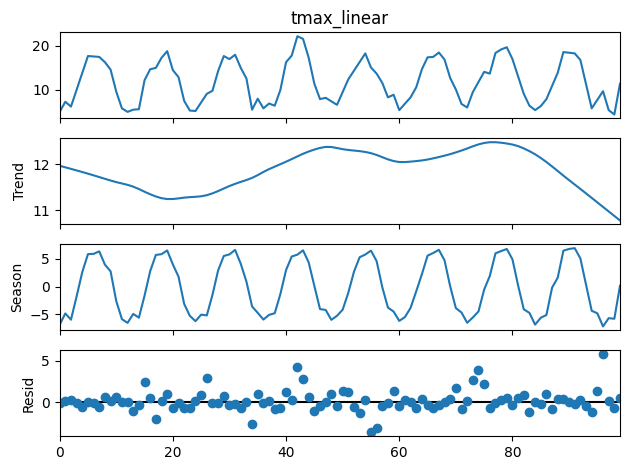

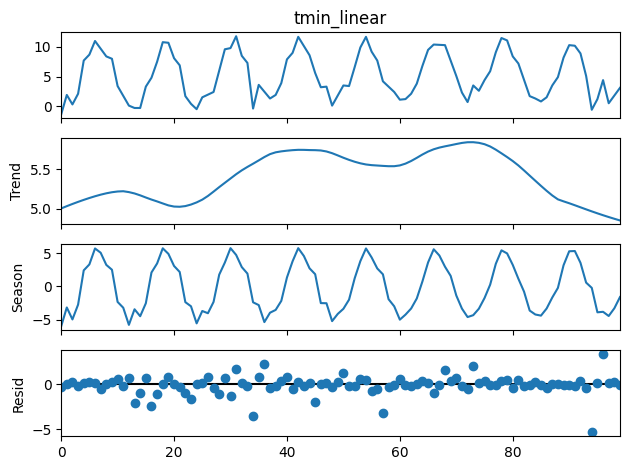

In [66]:
from statsmodels.tsa.seasonal import STL

stl_tmax = STL(df['tmax_linear'], period=12, robust=True).fit()
stl_tmin = STL(df['tmin_linear'], period=12, robust=True).fit()
stl_tmax.plot()
stl_tmin.plot()